# **Training the Transfer Learning Models**

**Import some primiry libs**

In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

print ("Primiry Libs set up!!!")

Primiry Libs set up!!!


## **Data Loading**

**Load Image Data Path**

In [2]:
# base dir of data
base_dir = r'D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\datasets\processed_data_v2' # train, val, test = 0.8, 0.1, 0.1
# base_dir = r'D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\datasets\processed_data_v2' # train, val, test = 0.7, 0.2, 0.1
# get sub dir of data
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# print
print("Base dir: ", base_dir)
print("Train dir: ", train_dir)
print("Val dir: ", val_dir)
print("Test dir: ", test_dir)

Base dir:  D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\datasets\processed_data_v2
Train dir:  D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\datasets\processed_data_v2\train
Val dir:  D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\datasets\processed_data_v2\val
Test dir:  D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\datasets\processed_data_v2\test


**Class Names**: *Make sure that the classes specified are all correspond to the alphabetic order of the folders*

```bash
dataset/test/
  class1/
  class2/
  class3/
```

so the class names should be like this:

``` python
class_names = ['class1', 'class2', 'class3']
```


In [3]:
class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]) # sorted is optional, but it helps to keep the class names in order
print("Class names: ", class_names)

Class names:  ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


Train
Blight images:  916
Common Rust images:  1044
Gray Leaf Spot images:  459
Healthy images:  929


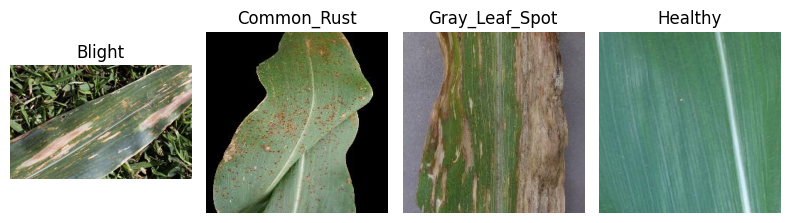

In [4]:
from matplotlib import image as mpimg

# List image files for each class
blight_images, common_rust_images, gray_leaf_spot_images, healthy_images = [os.listdir(images) for name in class_names for images in [os.path.join(train_dir, name)]]
print("Train")
print("Blight images: ", len(blight_images))
print("Common Rust images: ", len(common_rust_images))
print("Gray Leaf Spot images: ", len(gray_leaf_spot_images))
print("Healthy images: ", len(healthy_images))

pic_index = 100
def safe_get(images, idx):
    return images[idx] if len(images) > idx else images[0]

# get image paths of each class
train_Blight_dir = os.path.join(train_dir, 'Blight')
train_Common_Rust_dir = os.path.join(train_dir, 'Common_Rust')
train_Gray_Leaf_Spot_dir = os.path.join(train_dir, 'Gray_Leaf_Spot')
train_Healthy_dir = os.path.join(train_dir, 'Healthy')

#  get image paths
img_paths = [
    os.path.join(train_Blight_dir, safe_get(blight_images, pic_index)),
    os.path.join(train_Common_Rust_dir, safe_get(common_rust_images, pic_index)),
    os.path.join(train_Gray_Leaf_Spot_dir, safe_get(gray_leaf_spot_images, pic_index)),
    os.path.join(train_Healthy_dir, safe_get(healthy_images, pic_index))
]

nrows, ncols = 1, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(8, 8))
axes = axes.flatten()
titles = class_names

for i, (img_path, title) in enumerate(zip(img_paths, titles)):
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(title)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

---

## **Image Preprocessing**

**Data Augmentation**

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# for val, test, and new data
val_datagen = ImageDataGenerator(rescale=1./255) # rescale only
test_datagen = ImageDataGenerator(rescale=1./255) 
new_datagen = ImageDataGenerator(rescale=1./255) 

**Preprocessing the image of the split data**

We are going to resize our images to 224x224 pixels, which is the input size for most of the pre-trained models: `ResNet50`, 
`VGG` (e.g., `VGG16`, `VGG19`), `DenseNet` (e.g., `DenseNet121`), `MobileNetV2`, `EfficientNet-B0` (also trained on 224x224), `AlexNet`, `SqueezeNet`

In [7]:
# set batch size and image size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# train data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
)
print("Train generator: ", train_generator.class_indices)

# val data generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
)
print("Val generator: ", val_generator.class_indices)

# test data generator (new data is also processed like test data)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
)

print("Test generator: ", test_generator.class_indices)

Found 3348 images belonging to 4 classes.
Train generator:  {'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}
Found 419 images belonging to 4 classes.
Val generator:  {'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}
Found 421 images belonging to 4 classes.
Test generator:  {'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}


In [ ]:
# save the prcessed data


## **Model Specification**

### **Load The Base Models**

#### **CNNs Pretrain Models -> (224x224)**

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

print("Models for 224x224 loaded up!!!")

Models for 224x224 loaded up!!!


##### **VGG16**

In [24]:
# load base model with imagenet weights, exclude top layers
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in vgg16_base.layers:
    layer.trainable = False

# compile and fit
# Flatten the output layer to 1 dimension
x = Flatten()(vgg16_base.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = Dropout(0.5)(x)

# Add a final softmax layer with class length of 4 (number of classes)
x = Dense(len(class_names), activation='softmax')(x)

# Compile the model
model_vgg16 = Model(vgg16_base.input, x)
model_vgg16.compile(optimizer = Adam(learning_rate=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])
print("Model VGG16 compiled!!!")

Model VGG16 compiled!!!


In [28]:
# train
history_vgg16 = model_vgg16.fit(train_generator, validation_data = val_generator, epochs = 10)
print("Model VGG16 trained!!!")

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 314s 3s/step - acc: 0.8474 - loss: 0.2045 - val_acc: 0.8520 - val_loss: 0.1716
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 295s 3s/step - acc: 0.8600 - loss: 0.1868 - val_acc: 0.8974 - val_loss: 0.1343
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 294s 3s/step - acc: 0.8657 - loss: 0.1749 - val_acc: 0.9021 - val_loss: 0.1281
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 294s 3s/step - acc: 0.8797 - loss: 0.1702 - val_acc: 0.8950 - val_loss: 0.1208
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 299s 3s/step - acc: 0.8541 - loss: 0.1641 - val_acc: 0.8878 - val_loss: 0.1342
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 295s 3s/step - acc: 0.8772 - loss: 0.1554 - val_acc: 0.9117 - val_loss: 0.1160
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 31752s 305s/step - acc: 0.8767 - loss: 0.1512 - val_acc: 0.9045 - val_loss: 0.1130
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 295s 3s/step - acc: 0.8845 - loss: 0.1420 - val_acc: 0.9069 - val_loss: 0.1197
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 291s

In [31]:
model_vgg16.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,257,550 (203.16 MB)

 Trainable params: 12,847,620 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 25,695,242 (98.02 MB)

In [38]:
import matplotlib.pyplot as plt

# Correct the function name and the keys used for plotting
def accuracy_loss(history):
    # Accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    # Use 'acc' instead of 'accuracy'
    plt.plot(history.history['acc'], label='Train Accuracy')
    # Use 'val_acc' instead of 'val_accuracy'
    plt.plot(history.history['val_acc'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

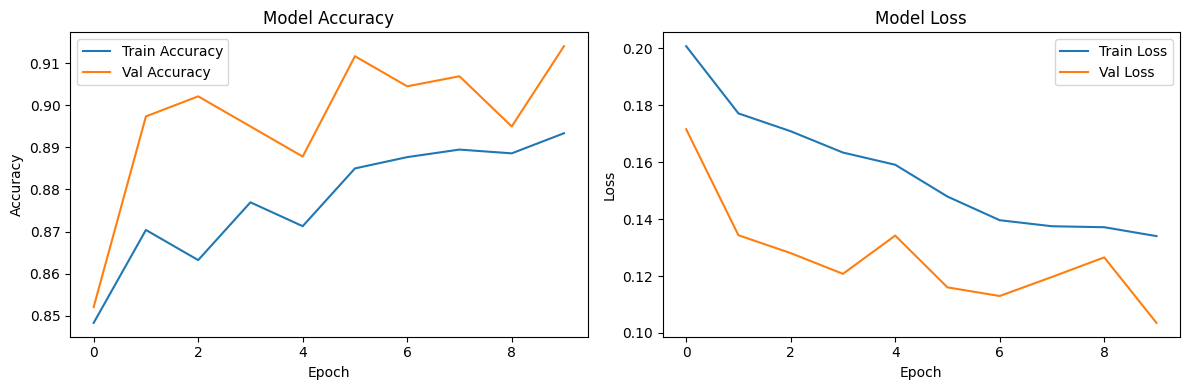

In [40]:
accuracy_loss(history=history_vgg16)

Create function to store model performance for model comparison

In [45]:
# create history dataframe
import pandas as pd
import os

# Define the default base directory for saving results
DEFAULT_BASE_DIR = r"D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\notebooks\transfer_models"

#  designed to append results to the same CSV
def save_model_results_to_csv(model, history, model_name, base_dir = DEFAULT_BASE_DIR):
    # Create DataFrame from history
    history_df = pd.DataFrame(history.history)

    # Add epoch numbers (starting from 1)
    history_df['epoch'] = [e + 1 for e in history.epoch]

    # Add model name
    history_df['model_name'] = model_name

    # Get total parameters
    total_params = model.count_params()
    history_df['total_params'] = total_params

    # Select and reorder columns (optional, but good for consistency)
    history_df = history_df[['model_name', 'epoch', 'loss', 'acc', 'val_loss', 'val_acc', 'total_params']]

    # Define the path for the CSV file (save it one level up from base_dir)
    csv_filename = 'model_performance_summary.csv'
    # Go up one level from base_dir
    csv_filepath = os.path.join(base_dir, csv_filename)

    # Check if file exists to append or write header
    file_exists = os.path.isfile(csv_filepath)

    # Save to CSV - append if file exists, write header otherwise
    try:
        history_df.to_csv(csv_filepath, mode='a', header=not file_exists, index=False)
        print(f"Results for {model_name} appended to {csv_filepath}")
    except Exception as e:
        print(f"Error saving results for {model_name}: {e}")

In [ ]:
# save_model_results_to_csv(model=model_vgg16, history=history_vgg16, model_name='VGG16')

Results for VGG16 appended to D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\notebooks\transfer_models\model_performance_summary.csv


In [ ]:
# save the model
MODEL_DIR = r"D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\models\pre_trained_models"
# model_vgg16.save(os.path.join(MODEL_DIR, 'vgg16_model.keras'))

In [ ]:
# predict on test data
predictions = model_vgg16.predict(test_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# see dimension
print("Predictions: ", y_pred.shape)
print("True labels: ", y_true.shape)

In [56]:
# confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

def confusion_matrix_plot(y_true, y_pred, model_name):
    # plot cm
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xticks(rotation=45)
    plt.show()

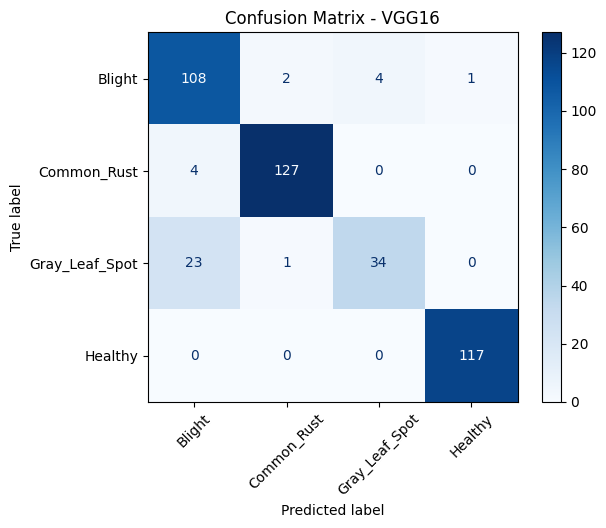

In [57]:
confusion_matrix_plot(y_true, y_pred, "VGG16")

In [58]:
# classification report
print(classification_report(y_true, y_pred, target_names=class_names))

                precision    recall  f1-score   support

        Blight       0.80      0.94      0.86       115
   Common_Rust       0.98      0.97      0.97       131
Gray_Leaf_Spot       0.89      0.59      0.71        58
       Healthy       0.99      1.00      1.00       117

      accuracy                           0.92       421
     macro avg       0.92      0.87      0.89       421
  weighted avg       0.92      0.92      0.91       421



##### **VGG19**

In [92]:
from tensorflow.keras.applications import VGG19

# load base model with imagenet weights, exclude top layers
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in vgg19_base.layers:
    layer.trainable = False

# compile and fit
# Flatten the output layer to 1 dimension
x = Flatten()(vgg19_base.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = Dropout(0.5)(x)

# Add a final softmax layer with class length of 4 (number of classes)
x = Dense(len(class_names), activation='softmax')(x)

# Compile the model
vgg19_model = Model(vgg19_base.input, x)
vgg19_model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])
print("Model VGG19 compiled!!!")

Model VGG19 compiled!!!


In [93]:
# train
vgg19_history = vgg19_model.fit(train_generator, validation_data = val_generator, epochs = 10)
print("Model VGG19 trained!!!")

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 409s 4s/step - acc: 0.5939 - loss: 1.1059 - val_acc: 0.8640 - val_loss: 0.3579
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 390s 4s/step - acc: 0.8277 - loss: 0.4548 - val_acc: 0.8854 - val_loss: 0.3102
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 391s 4s/step - acc: 0.8147 - loss: 0.4506 - val_acc: 0.8687 - val_loss: 0.3503
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 392s 4s/step - acc: 0.8504 - loss: 0.3893 - val_acc: 0.8831 - val_loss: 0.2966
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 391s 4s/step - acc: 0.8599 - loss: 0.3571 - val_acc: 0.9093 - val_loss: 0.2550
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 390s 4s/step - acc: 0.8614 - loss: 0.3536 - val_acc: 0.8807 - val_loss: 0.2722
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 393s 4s/step - acc: 0.8608 - loss: 0.3741 - val_acc: 0.8831 - val_loss: 0.3000
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 413s 4s/step - acc: 0.8654 - loss: 0.3636 - val_acc: 0.8783 - val_loss: 0.2727
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 410s 4s/

In [94]:
# summary
vgg19_model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             

 Total params: 58,567,246 (223.42 MB)

 Trainable params: 12,847,620 (49.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 25,695,242 (98.02 MB)

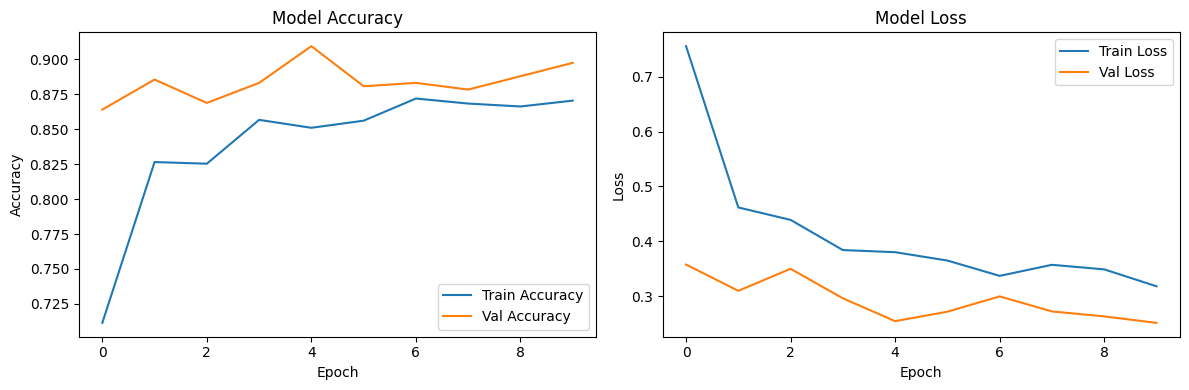

In [95]:
# plot accuracy and loss
accuracy_loss(history=vgg19_history)

In [ ]:
# save the results to csv
# save_model_results_to_csv(model=vgg19_model, history=vgg19_history, model_name='VGG19')

Results for VGG19 appended to D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\notebooks\transfer_models\model_performance_summary.csv


In [ ]:
# save the model
# vgg19_model.save(os.path.join(MODEL_DIR, 'vgg19_model.keras'))

In [96]:
# predict on test data
predictions = vgg19_model.predict(test_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# see dimension
print("Predictions: ", y_pred.shape)
print("True labels: ", y_true.shape)

14/14 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step
Predictions:  (421,)
True labels:  (421,)


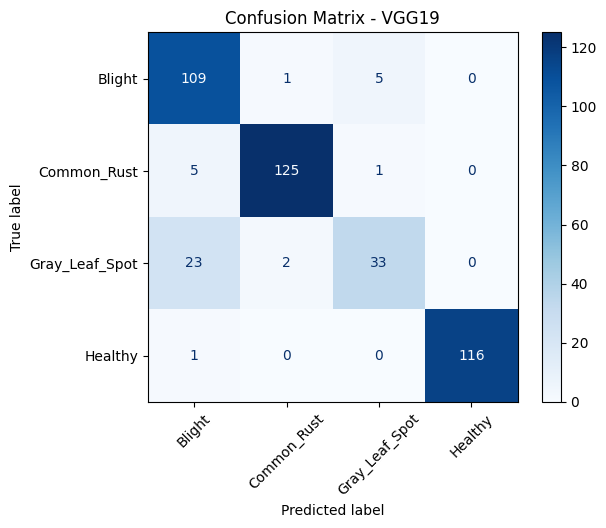

In [97]:
# confusion matrix
confusion_matrix_plot(y_true, y_pred, "VGG19")

In [98]:
# classification report
print(classification_report(y_true, y_pred, target_names=class_names))

                precision    recall  f1-score   support

        Blight       0.79      0.95      0.86       115
   Common_Rust       0.98      0.95      0.97       131
Gray_Leaf_Spot       0.85      0.57      0.68        58
       Healthy       1.00      0.99      1.00       117

      accuracy                           0.91       421
     macro avg       0.90      0.87      0.88       421
  weighted avg       0.91      0.91      0.91       421



##### **ResNet50**

In [89]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam    

# load base
resnet50_base = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze the base model
resnet50_base.trainable = False

# input
inputs = resnet50_base.input

# Add Global Average Pooling layer after the base model output
x = GlobalAveragePooling2D()(resnet50_base.output)

# Add Dense layers
# x = Dense(128, activation='relu')(resnet50_base.output)
# x = Dense(50, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
outputs = Dense(len(class_names), activation='softmax')(x)

# the final model
resnet50_model = Model(inputs=inputs, outputs=outputs)

#  compile the model
resnet50_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
print("Model ResNet50 defined and compiled!!!")

Model ResNet50 defined and compiled!!!


In [90]:
# training
resnet50_history = resnet50_model.fit(train_generator, validation_data=val_generator, epochs=10)
print("Model ResNet50 trained!!!")

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - acc: 0.3433 - loss: 1.6239 - val_acc: 0.3819 - val_loss: 1.1454
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - acc: 0.4686 - loss: 1.2031 - val_acc: 0.5465 - val_loss: 1.0200
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - acc: 0.5303 - loss: 1.1045 - val_acc: 0.6372 - val_loss: 0.9194
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - acc: 0.5402 - loss: 1.0328 - val_acc: 0.6158 - val_loss: 0.8712
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - acc: 0.5648 - loss: 1.0058 - val_acc: 0.5823 - val_loss: 0.8601
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - acc: 0.5939 - loss: 0.9463 - val_acc: 0.6826 - val_loss: 0.8064
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - acc: 0.6083 - loss: 0.9216 - val_acc: 0.6348 - val_loss: 0.7687
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - acc: 0.6039 - loss: 0.9303 - val_acc: 0.6635 - val_loss: 0.7807
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/

In [140]:
# inspect the model
resnet50_model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_19[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 29,894,542 (114.04 MB)

 Trainable params: 2,102,276 (8.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 4,204,554 (16.04 MB)

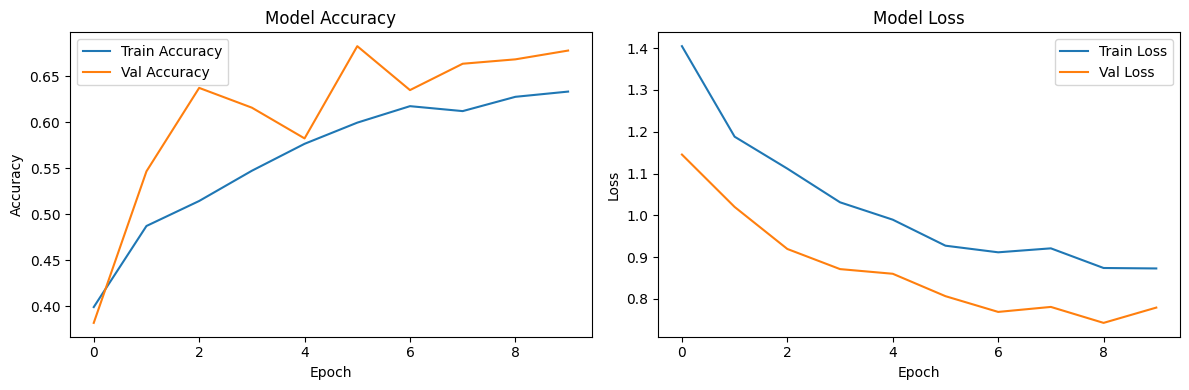

In [141]:
# see accuracy and loss
accuracy_loss(history=resnet50_history)

In [ ]:
# save records of the model
# save_model_results_to_csv(model=resnet50_model, history=resnet50_history, model_name='ResNet50')

Results for ResNet50 appended to D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\notebooks\transfer_models\model_performance_summary.csv


In [ ]:
# save the model
# resnet50_model.save(os.path.join(MODEL_DIR, 'resnet50_model.keras'))

In [144]:
# predict on test data
predictions = resnet50_model.predict(test_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# see dimension
print("Predictions: ", y_pred.shape)
print("True labels: ", y_true.shape)

14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step
Predictions:  (421,)
True labels:  (421,)


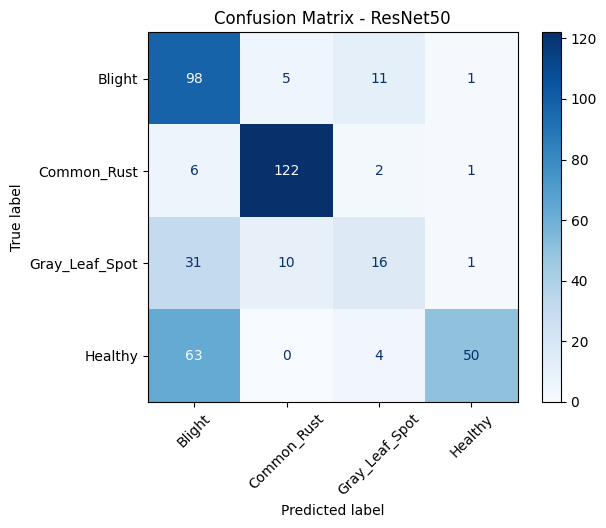

In [145]:
# confusion matrix
confusion_matrix_plot(y_true, y_pred, "ResNet50")

In [146]:
# classification report
print(classification_report(y_true, y_pred, target_names=class_names))

                precision    recall  f1-score   support

        Blight       0.49      0.85      0.63       115
   Common_Rust       0.89      0.93      0.91       131
Gray_Leaf_Spot       0.48      0.28      0.35        58
       Healthy       0.94      0.43      0.59       117

      accuracy                           0.68       421
     macro avg       0.70      0.62      0.62       421
  weighted avg       0.74      0.68      0.67       421



##### **EfficentNet (Needs More Research)**

In [108]:
from tensorflow.keras.applications import EfficientNetB0
print("EfficientNet loaded up!!!")

EfficientNet loaded up!!!


In [109]:
from tensorflow.keras.optimizers import RMSprop

# load base model with imagenet weights, exclude top layers
efficientnetb0_base = EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# freeze the layers:
for layer in efficientnetb0_base.layers:
    layer.trainable = False

# input 
inputs = efficientnetb0_base.input

# add layers
x = efficientnetb0_base.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)

# Add a final
predictions = Dense(len(class_names), activation="softmax")(x)
efficientnetb0_model = Model(inputs, predictions)

# compile the modelmodel_final.compile(
efficientnetb0_model.compile(
    optimizer=RMSprop(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['acc']
)

print("Model EfficientNetB0 defined and compiled!!!")

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Model EfficientNetB0 defined and compiled!!!


In [110]:
# train efficientnetb0
efficientnetb0_history = efficientnetb0_model.fit(train_generator, validation_data=val_generator, epochs=10)
print("Model EfficientNetB0 trained!!!")

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - acc: 0.2716 - loss: 4.7600 - val_acc: 0.2745 - val_loss: 1.3684
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 105s 999ms/step - acc: 0.3122 - loss: 1.3802 - val_acc: 0.2745 - val_loss: 1.3563
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 105s 999ms/step - acc: 0.2817 - loss: 1.3676 - val_acc: 0.2745 - val_loss: 1.3546
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - acc: 0.3057 - loss: 1.3710 - val_acc: 0.3126 - val_loss: 1.3509
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 98s 931ms/step - acc: 0.3053 - loss: 1.3695 - val_acc: 0.3126 - val_loss: 1.3481
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 96s 916ms/step - acc: 0.3183 - loss: 1.3694 - val_acc: 0.3126 - val_loss: 1.3670
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 91s 868ms/step - acc: 0.3173 - loss: 1.3644 - val_acc: 0.3126 - val_loss: 1.3744
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 90s 853ms/step - acc: 0.3048 - loss: 1.3675 - val_acc: 0.3126 - val_loss: 1.3515
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━

In [111]:
# predict on test data
predictions = efficientnetb0_model.predict(test_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# see dimension
print("Predictions: ", y_pred.shape)
print("True labels: ", y_true.shape)

14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 608ms/step
Predictions:  (421,)
True labels:  (421,)


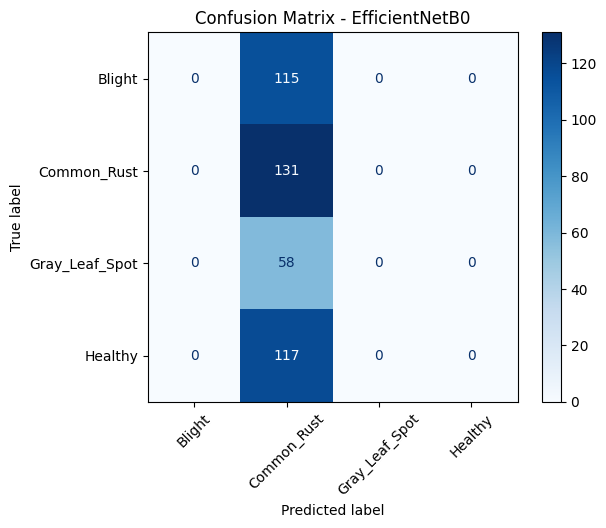

In [112]:
# confusion matrix
confusion_matrix_plot(y_true, y_pred, "EfficientNetB0")

##### **DenseNet121**

In [113]:
from tensorflow.keras.applications import DenseNet121
print("DenseNet121 loaded up!!!")

DenseNet121 loaded up!!!


In [117]:
# Load the DenseNet121 model with pre-trained weights
densenet121_base = DenseNet121(
        weights='imagenet', 
        include_top=False, 
        input_shape=(224, 224, 3)
    )

# Add global average pooling layer and a fully connected layer with softmax activation
x = densenet121_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(class_names), activation='softmax')(x)

# Create the full model
densenet121_model = Model(inputs=densenet121_base.input, outputs=predictions)

# Freeze the layers of the base model
for layer in densenet121_base.layers:
    layer.trainable = False

# Compile the model
densenet121_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])
print("Model DenseNet121 defined and compiled!!!")

Model DenseNet121 defined and compiled!!!


In [118]:
# Train the model
densenet121_history = densenet121_model.fit(train_generator, validation_data=val_generator, epochs=10)
print("Model DenseNet121 trained!!!")

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - acc: 0.7614 - loss: 0.7225 - val_acc: 0.9212 - val_loss: 0.2077
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - acc: 0.9021 - loss: 0.2370 - val_acc: 0.9236 - val_loss: 0.2133
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - acc: 0.9062 - loss: 0.2391 - val_acc: 0.9021 - val_loss: 0.2171
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - acc: 0.9187 - loss: 0.2059 - val_acc: 0.9236 - val_loss: 0.1779
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - acc: 0.9198 - loss: 0.1893 - val_acc: 0.9212 - val_loss: 0.2066
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - acc: 0.9346 - loss: 0.1786 - val_acc: 0.8926 - val_loss: 0.2677
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - acc: 0.9276 - loss: 0.1736 - val_acc: 0.9308 - val_loss: 0.1881
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - acc: 0.9292 - loss: 0.1833 - val_acc: 0.9403 - val_loss: 0.1708
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/

In [132]:
# inspect the model
densenet121_model.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_30      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 230, 230,  │          0 │ input_layer_30[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_3… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 10,198,606 (38.90 MB)

 Trainable params: 1,053,700 (4.02 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

 Optimizer params: 2,107,402 (8.04 MB)

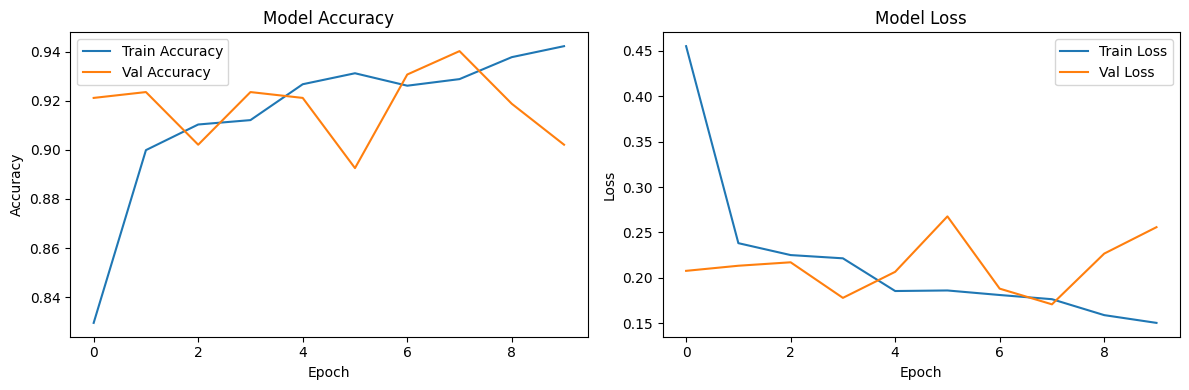

In [133]:
# plot accuracy and loss
accuracy_loss(history=densenet121_history)

In [ ]:
# save results to csv
# save_model_results_to_csv(model=densenet121_model, history=densenet121_history, model_name='DenseNet121')

Results for DenseNet121 appended to D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\notebooks\transfer_models\model_performance_summary.csv


In [ ]:
# save the model
# densenet121_model.save(os.path.join(MODEL_DIR, 'densenet121_model.keras'))

In [135]:
# predict on test data
predictions = densenet121_model.predict(test_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# see dimension
print("Predictions: ", y_pred.shape)
print("True labels: ", y_true.shape)

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step
Predictions:  (421,)
True labels:  (421,)


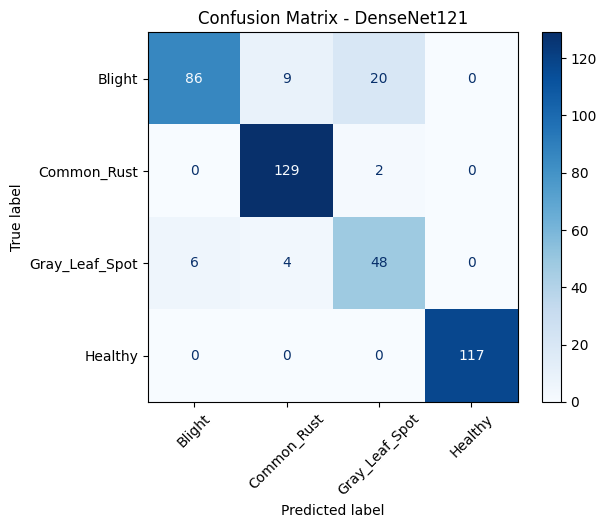

In [136]:
# confusion matrix
confusion_matrix_plot(y_true, y_pred, "DenseNet121")

In [137]:
# classification report
print(classification_report(y_true, y_pred, target_names=class_names))

                precision    recall  f1-score   support

        Blight       0.93      0.75      0.83       115
   Common_Rust       0.91      0.98      0.95       131
Gray_Leaf_Spot       0.69      0.83      0.75        58
       Healthy       1.00      1.00      1.00       117

      accuracy                           0.90       421
     macro avg       0.88      0.89      0.88       421
  weighted avg       0.91      0.90      0.90       421



##### **MobileNetV2**

In [119]:
from tensorflow.keras.applications import MobileNetV2
print("MobileNetV2 loaded up!!!")

MobileNetV2 loaded up!!!


In [123]:
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.models import Sequential

# Create the base model from the pre-trained model MobileNet V2
mobilenetv2_base = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in mobilenetv2_base.layers[:-4]:
    layer.trainable = False

# add layers
mobilenetv2_model = Sequential()
mobilenetv2_model.add(mobilenetv2_base)
mobilenetv2_model.add(AveragePooling2D(pool_size=(2, 2)))
mobilenetv2_model.add(Flatten())
mobilenetv2_model.add(Dense(512, activation="relu"))
mobilenetv2_model.add(Dropout(0.5))
mobilenetv2_model.add(Dense(50, activation="relu"))
mobilenetv2_model.add(Dropout(0.5))
mobilenetv2_model.add(Dense(len(class_names), activation='softmax'))

# compile the model
mobilenetv2_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])
print("Model MobileNetV2 defined and compiled!!!")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step
Model MobileNetV2 defined and compiled!!!


In [124]:
# train the model
mobilenetv2_history = mobilenetv2_model.fit(train_generator, validation_data=val_generator, epochs=10)
print("Model MobileNetV2 trained!!!")

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 100s 903ms/step - acc: 0.6432 - loss: 1.6677 - val_acc: 0.8353 - val_loss: 0.3175
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 69s 660ms/step - acc: 0.7961 - loss: 0.5511 - val_acc: 0.8950 - val_loss: 0.2660
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 68s 643ms/step - acc: 0.8275 - loss: 0.4709 - val_acc: 0.8783 - val_loss: 0.3240
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 66s 630ms/step - acc: 0.8523 - loss: 0.4103 - val_acc: 0.8854 - val_loss: 0.2958
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 66s 627ms/step - acc: 0.8602 - loss: 0.3837 - val_acc: 0.8974 - val_loss: 0.3410
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 65s 621ms/step - acc: 0.8941 - loss: 0.2862 - val_acc: 0.9045 - val_loss: 0.3019
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 71s 674ms/step - acc: 0.8942 - loss: 0.3223 - val_acc: 0.8878 - val_loss: 0.4157
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 80s 764ms/step - acc: 0.8877 - loss: 0.3154 - val_acc: 0.8974 - val_loss: 0.3168
Epoch 9/10
105/105 ━━━━━━━━━━━━

In [126]:
# inspect the parameters of the model
mobilenetv2_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 3, 3, 1280)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 11520)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 512)            │     5,898,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 50)             │        25,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,857,404 (79.56 MB)

 Trainable params: 6,337,406 (24.18 MB)

 Non-trainable params: 1,845,184 (7.04 MB)

 Optimizer params: 12,674,814 (48.35 MB)

In [ ]:
# save the model
# mobilenetv2_model.save(os.path.join(MODEL_DIR, 'mobilenetv2_model.keras'))

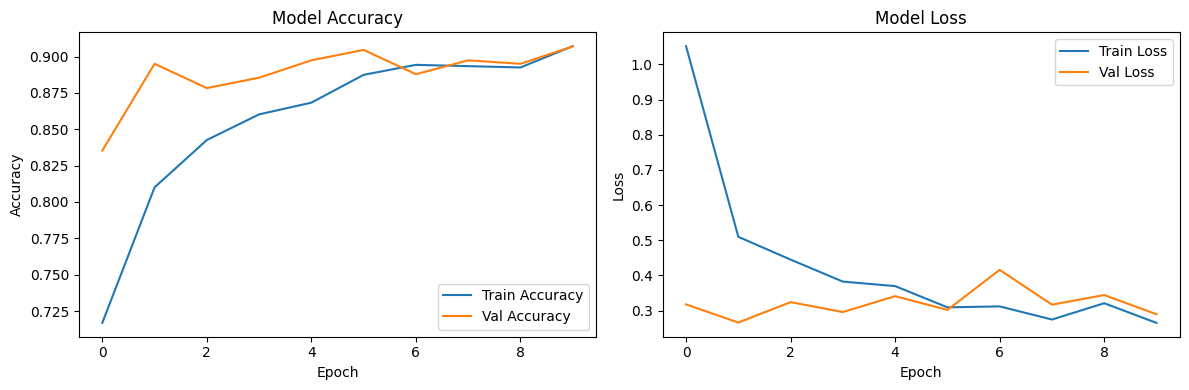

In [127]:
# see accuracy and loss of the model
accuracy_loss(history=mobilenetv2_history)

In [ ]:
# save records of the model
# save_model_results_to_csv(model=mobilenetv2_model, history=mobilenetv2_history, model_name='MobileNetV2')

Results for MobileNetV2 appended to D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\notebooks\transfer_models\model_performance_summary.csv


In [129]:
# predict on test data
predictions = mobilenetv2_model.predict(test_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# see dimension
print("Predictions: ", y_pred.shape)
print("True labels: ", y_true.shape)

14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 646ms/step
Predictions:  (421,)
True labels:  (421,)


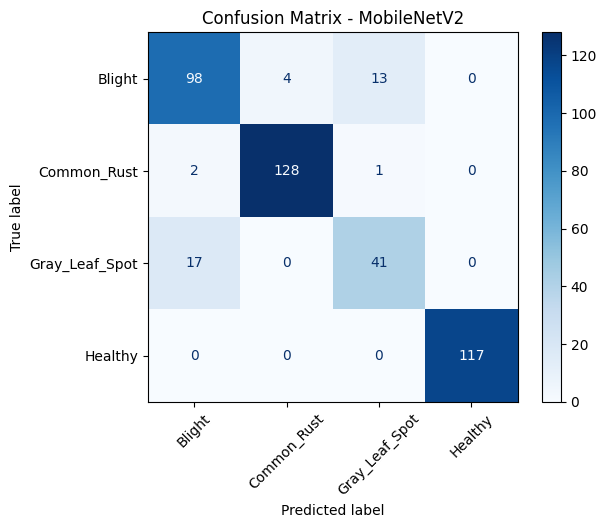

In [130]:
# plot confusion matrix
confusion_matrix_plot(y_true, y_pred, "MobileNetV2")

In [131]:
# classification report
print("MobileNetV2 Classification Report")
print(classification_report(y_true, y_pred, target_names=class_names))

MobileNetV2 Classification Report
                precision    recall  f1-score   support

        Blight       0.84      0.85      0.84       115
   Common_Rust       0.97      0.98      0.97       131
Gray_Leaf_Spot       0.75      0.71      0.73        58
       Healthy       1.00      1.00      1.00       117

      accuracy                           0.91       421
     macro avg       0.89      0.88      0.89       421
  weighted avg       0.91      0.91      0.91       421



##### **End**

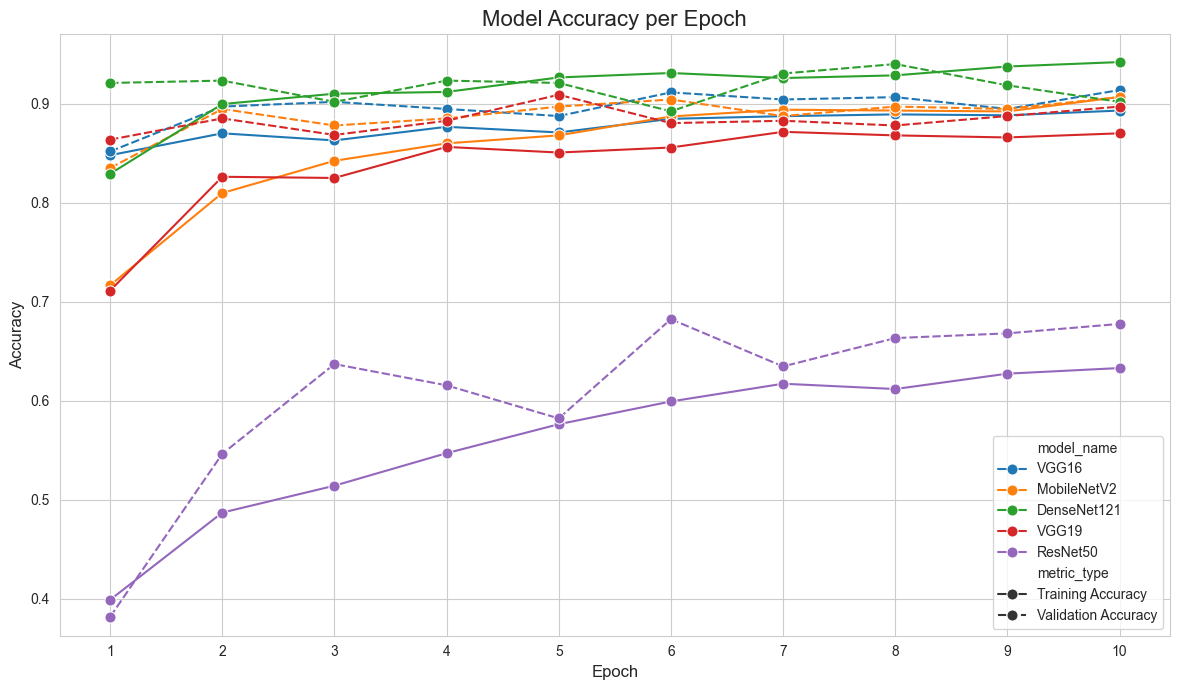

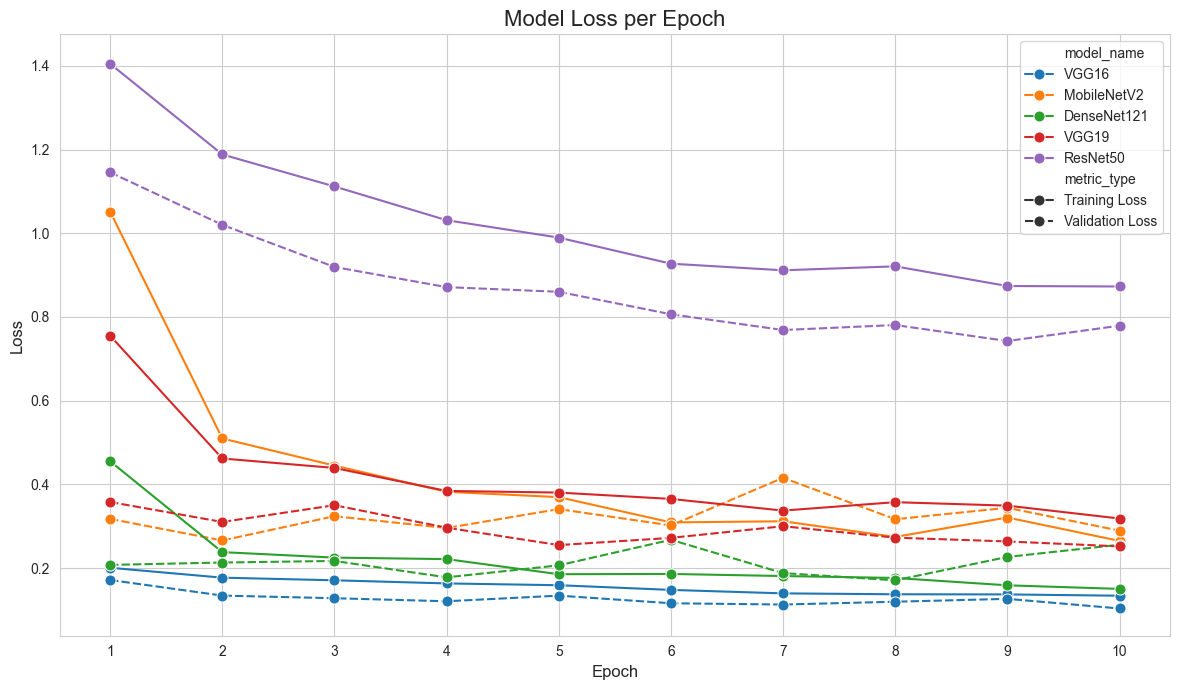

In [7]:
# ... existing code ...
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Make sure to replace the file path with the correct one if necessary
file_path = 'd:/School/ITC/Y3/Semet 2/Mini Project/Project Folder/Corn-Disease-Detection/notebooks/transfer_models/model_performance_summary.csv'
df = pd.read_csv(file_path)

# Melt the DataFrame for accuracy metrics
df_acc = pd.melt(df, id_vars=['model_name', 'epoch'], value_vars=['acc', 'val_acc'],
                 var_name='metric_type', value_name='accuracy')
# Assign clearer names for legend entries
df_acc['metric_type'] = df_acc['metric_type'].replace({'acc': 'Training Accuracy', 'val_acc': 'Validation Accuracy'})

# Melt the DataFrame for loss metrics
# Change value_name to avoid conflict with existing 'loss' column
df_loss = pd.melt(df, id_vars=['model_name', 'epoch'], value_vars=['loss', 'val_loss'],
                  var_name='metric_type', value_name='loss_value') # Changed value_name here
# Assign clearer names for legend entries
df_loss['metric_type'] = df_loss['metric_type'].replace({'loss': 'Training Loss', 'val_loss': 'Validation Loss'})

# Set the plotting style
sns.set_style("whitegrid")

# --- Plot Accuracy ---
plt.figure(figsize=(14, 7))
# hue maps model_name to color, style maps metric_type (Train/Val) to line style
acc_plot = sns.lineplot(data=df_acc, x='epoch', y='accuracy', hue='model_name', style='metric_type', marker='o', markersize=8) # Changed y='accuracy' to y='accuracy'
plt.title('Model Accuracy per Epoch', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(range(1, df['epoch'].max() + 1)) # Ensure integer ticks for epochs
plt.ylim(bottom=df_acc['accuracy'].min() * 0.95) # Adjust y-axis limits slightly
# The legend will show entries for each combination of model (color) and metric type (line style)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
plt.show()

# --- Plot Loss ---
plt.figure(figsize=(14, 7))
# hue maps model_name to color, style maps metric_type (Train/Val) to line style
loss_plot = sns.lineplot(data=df_loss, x='epoch', y='loss_value', hue='model_name', style='metric_type', marker='o', markersize=8) # Changed y='loss' to y='loss_value'
plt.title('Model Loss per Epoch', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12) # Label can remain 'Loss'
plt.xticks(range(1, df['epoch'].max() + 1)) # Ensure integer ticks for epochs
plt.ylim(top=df_loss['loss_value'].max() * 1.05) # Changed df_loss['loss'] to df_loss['loss_value']
# The legend will show entries for each combination of model (color) and metric type (line style)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
plt.show()